In [44]:
from mi_import import *
from exploracion_datos import *

In [45]:
california_base_df = pd.read_csv('../dataset/california_df.csv')

In [46]:
california_base_df.head()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Quarter,Pct_Change_Units,Pct_Change_Price,Elasticity
0,California,Weekly,2021-01-11,Organic,1.740612,376178.67,123236.27,57994.25,34.38,194913.77,NaN,NaN,NaN,2021Q1,NaN,NaN,NaN
1,California,Weekly,2021-01-17,Organic,1.745864,394732.15,123138.69,68676.63,8.44,202908.39,NaN,NaN,NaN,2021Q1,0.049321,0.003018,16.344662
2,California,Weekly,2021-01-24,Organic,1.701653,406028.76,130153.90,66508.94,0.00,209365.91,NaN,NaN,NaN,2021Q1,0.028618,-0.025323,-1.130129
3,California,Weekly,2021-01-31,Organic,1.585137,389566.49,116970.90,66120.51,11.77,206463.31,NaN,NaN,NaN,2021Q1,-0.040545,-0.068472,0.592131
4,California,Weekly,2021-02-07,Organic,1.682935,390947.22,116341.45,70391.87,15.22,204198.68,NaN,NaN,NaN,2021Q1,0.003544,0.061696,0.057447


In [47]:
min_value = 1e-6  # Un pequeño valor positivo para reemplazar ceros
variables_log = [
    'Total Bulk and Bags Units', '4046 Units', '4225 Units', '4770 Units', 'TotalBagged Units', 'SmlBagged Units',
]

In [48]:
for var in variables_log:
    california_base_df[f'log_{var}'] = np.log(california_base_df[var].clip(lower=min_value))

In [49]:
print(california_base_df[[f'log_{var}' for var in variables_log]].head())

   log_Total Bulk and Bags Units  log_4046 Units  log_4225 Units  \
0                      12.837819       11.721859       10.968099   
1                      12.885963       11.721067       11.137164   
2                      12.914179       11.776473       11.105092   
3                      12.872790       11.669680       11.099234   
4                      12.876328       11.664285       11.161833   

   log_4770 Units  log_TotalBagged Units  log_SmlBagged Units  
0        3.537475              12.180313                  NaN  
1        2.132982              12.220510                  NaN  
2      -13.815511              12.251839                  NaN  
3        2.465554              12.237878                  NaN  
4        2.722610              12.226849                  NaN  


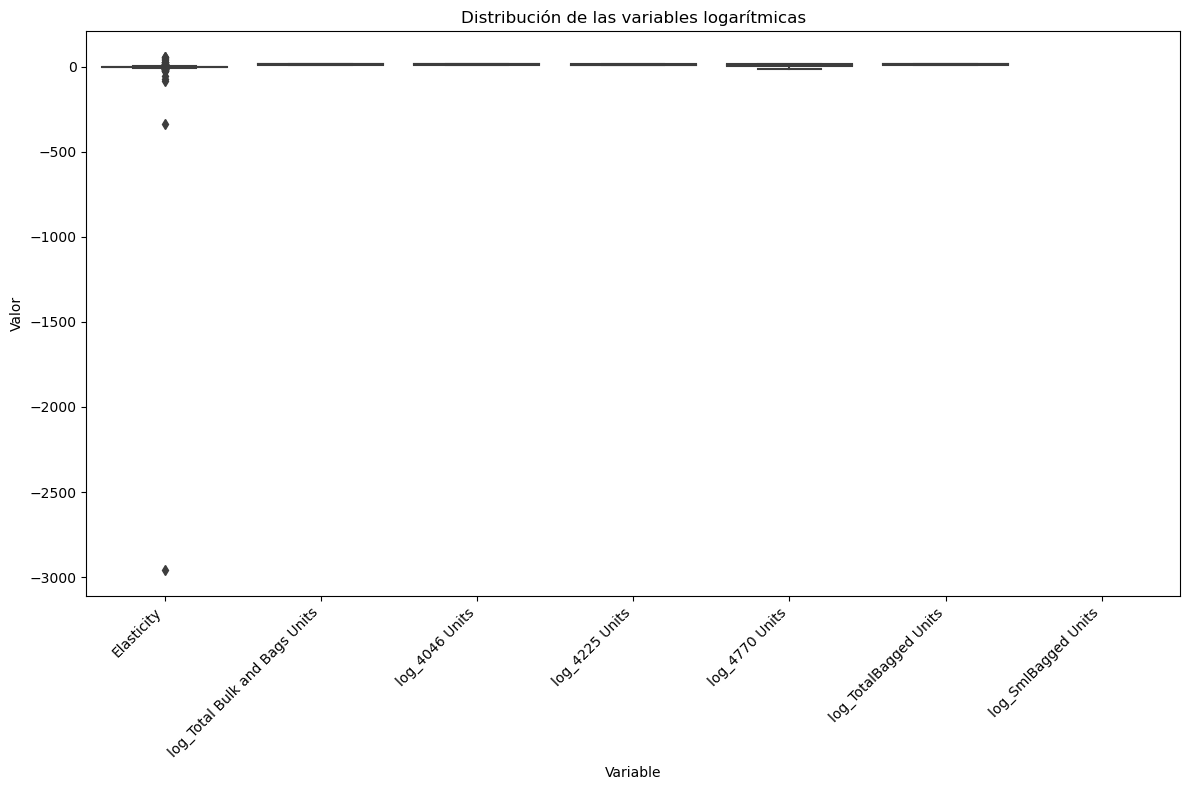

In [50]:
import seaborn as sns

variables_log = [f'log_{var}' for var in variables_log]

columns_to_plot = ['Elasticity'] + variables_log

plt.figure(figsize=(12, 8))
sns.boxplot(data=california_base_df[columns_to_plot])

plt.title('Distribución de las variables logarítmicas')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Valor')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()


In [51]:
# Calcular Q1, Q3 y el IQR de la variable 'Elasticity'
Q1 = california_base_df['Elasticity'].quantile(0.25)
Q3 = california_base_df['Elasticity'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
california_base_df_no_outliers = california_base_df[
    (california_base_df['Elasticity'] >= lower_bound) &
    (california_base_df['Elasticity'] <= upper_bound)
]

# Ver los primeros registros después de la eliminación de outliers
print(california_base_df_no_outliers[['Elasticity']].head())

   Elasticity
2   -1.130129
3    0.592131
4    0.057447
5   -1.617608
6   -0.588408


In [52]:
# Ordenar por la columna 'Elasticity' en orden descendente
top_elasticity_values = california_base_df.sort_values(by='Elasticity', ascending=False)

# Mostrar los 10 valores más altos
print(top_elasticity_values[['Elasticity']].head(10))


     Elasticity
133   56.989233
150   55.466072
268   49.819635
333   44.891222
258   37.842954
67    29.671387
134   28.726412
191   28.391252
338   24.765035
159   20.815163


In [53]:
print(california_base_df_no_outliers.columns)


Index(['Geography', 'Timeframe', 'Current Year Week Ending', 'Type',
       'ASP Current Year', 'Total Bulk and Bags Units', '4046 Units',
       '4225 Units', '4770 Units', 'TotalBagged Units', 'SmlBagged Units',
       'LrgBagged Units', 'X-LrgBagged Units', 'Quarter', 'Pct_Change_Units',
       'Pct_Change_Price', 'Elasticity', 'log_Total Bulk and Bags Units',
       'log_4046 Units', 'log_4225 Units', 'log_4770 Units',
       'log_TotalBagged Units', 'log_SmlBagged Units'],
      dtype='object')


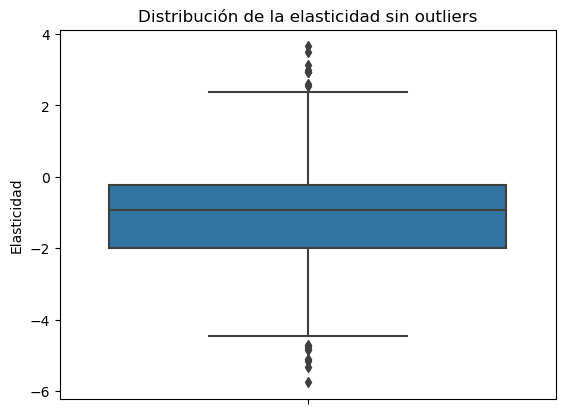

In [54]:
# Asegúrate de que la columna 'Elasticity' existe y está limpia
if 'Elasticity' in california_base_df_no_outliers.columns:
    # Crear el boxplot
    elasticity_plot = sns.boxplot(data=california_base_df_no_outliers, y='Elasticity')
    elasticity_plot.set_title('Distribución de la elasticidad sin outliers')
    elasticity_plot.set_ylabel('Elasticidad')
    elasticity_plot.set_xlabel('')

    # Mostrar el gráfico
    plt.show()
else:
    print("La columna 'Elasticity' no existe en el DataFrame.")

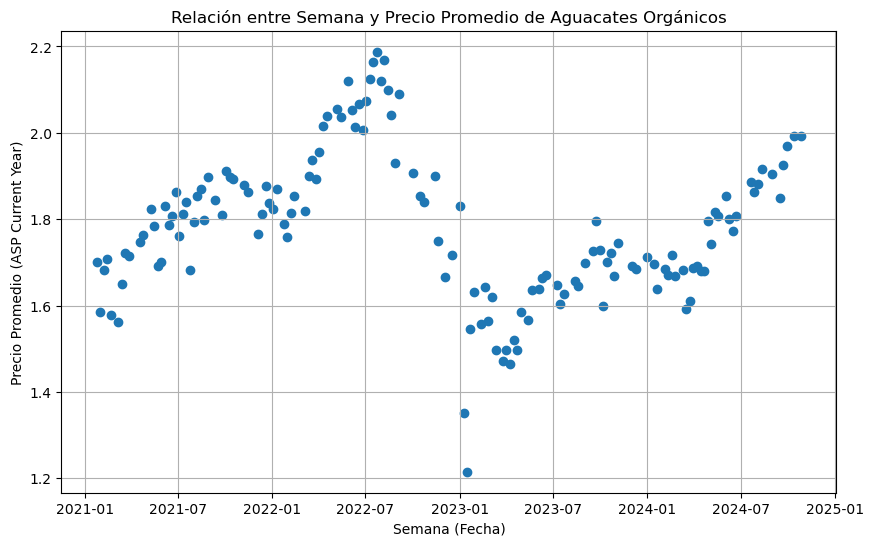

In [55]:
# Filtrar datos donde Type es 'Organic'
organic_data = california_base_df_no_outliers[california_base_df_no_outliers['Type'] == 'Organic']

# Agrupar por semana y calcular el precio promedio
x_clean_data = organic_data.groupby('Current Year Week Ending')['ASP Current Year'].mean()

# Convertir las fechas de la columna 'Current Year Week Ending' a formato datetime
y_clean_data = pd.to_datetime(x_clean_data.index)

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(y_clean_data, x_clean_data)
plt.title('Relación entre Semana y Precio Promedio de Aguacates Orgánicos')
plt.xlabel('Semana (Fecha)')
plt.ylabel('Precio Promedio (ASP Current Year)')
plt.grid(True)
plt.show()

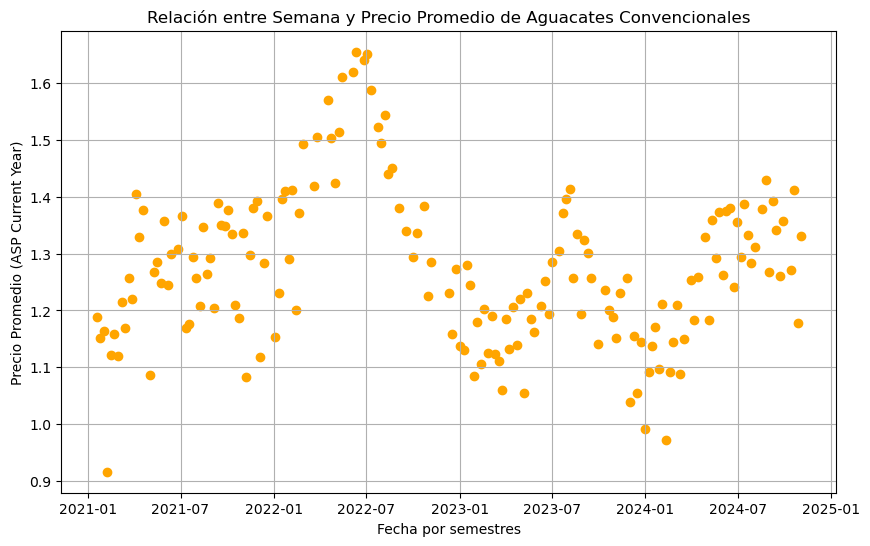

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar datos donde Type es 'Conventional'
conventional_data = california_base_df_no_outliers[california_base_df_no_outliers['Type'] == 'Conventional']

# Agrupar por semana y calcular el precio promedio
x_clean_data_conventional = conventional_data.groupby('Current Year Week Ending')['ASP Current Year'].mean()

# Convertir las fechas de la columna 'Current Year Week Ending' a formato datetime
y_clean_data_conventional = pd.to_datetime(x_clean_data_conventional.index)

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(y_clean_data_conventional, x_clean_data_conventional, color='orange')
plt.title('Relación entre Semana y Precio Promedio de Aguacates Convencionales')
plt.xlabel('Fecha por semestres')
plt.ylabel('Precio Promedio (ASP Current Year)')
plt.grid(True)
plt.show()


Creemos que el mejor modelo de regresión no lineal que puede capturar un ajuste adecuado, junto con una segmentación de los distintos clúster de datos, es utilizar máquinas de soporte vectorial, para ver los coeficientes que nos puedan presentar los hiperplanos que nos darían la distancia ideal para segmentar los datos de tal manera que se puedan hacer modelos robustos

In [57]:
# Asegurarnos de que las fechas estén en formato datetime
california_base_df_no_outliers['Current Year Week Ending'] = pd.to_datetime(
    california_base_df_no_outliers['Current Year Week Ending'], errors='coerce'
)

C:\Users\heatb\AppData\Local\Temp\ipykernel_5368\2694104621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_base_df_no_outliers['Current Year Week Ending'] = pd.to_datetime(


In [58]:
# Extraer el trimestre como una nueva característica
california_base_df_no_outliers['Quarter'] = california_base_df_no_outliers[
    'Current Year Week Ending'
].dt.quarter

C:\Users\heatb\AppData\Local\Temp\ipykernel_5368\1373167734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_base_df_no_outliers['Quarter'] = california_base_df_no_outliers[


In [59]:
# Seleccionar características y el target para datos orgánicos
organic_data = california_base_df_no_outliers[
    california_base_df_no_outliers['Type'] == 'Organic'
]

X_organic = organic_data[['Elasticity', 'log_4046 Units', 'log_4225 Units', 'log_4770 Units', 'Quarter']]
y_organic = organic_data['ASP Current Year']

In [60]:
# Clasificar los valores del precio en clases: "bajo", "medio" y "alto"
y_organic_classes = pd.qcut(y_organic, q=3, labels=['low', 'medium', 'high'])

In [61]:
# Dividir en conjunto de entrenamiento y prueba
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(
    X_organic, y_organic_classes, test_size=0.3, random_state=42
)

# Escalar los datos
scaler = StandardScaler()
X_train_org_scaled = scaler.fit_transform(X_train_org)
X_test_org_scaled = scaler.transform(X_test_org)

In [62]:
from sklearn.svm import SVC

# Entrenar el modelo SVM
svm_model_org = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
svm_model_org.fit(X_train_org_scaled, y_train_org)

SVC(C=1, gamma=0.1, probability=True)

In [63]:
# Repetir el mismo proceso para datos convencionales
conventional_data = california_base_df_no_outliers[
    california_base_df_no_outliers['Type'] == 'Conventional'
]

X_conventional = conventional_data[['Elasticity', 'log_4046 Units', 'log_4225 Units', 'log_4770 Units', 'Quarter']]
y_conventional = conventional_data['ASP Current Year']

y_conventional_classes = pd.qcut(y_conventional, q=3, labels=['low', 'medium', 'high'])

X_train_conv, X_test_conv, y_train_conv, y_test_conv = train_test_split(
    X_conventional, y_conventional_classes, test_size=0.3, random_state=42
)

X_train_conv_scaled = scaler.fit_transform(X_train_conv)
X_test_conv_scaled = scaler.transform(X_test_conv)

svm_model_conv = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
svm_model_conv.fit(X_train_conv_scaled, y_train_conv)

SVC(C=1, gamma=0.1, probability=True)

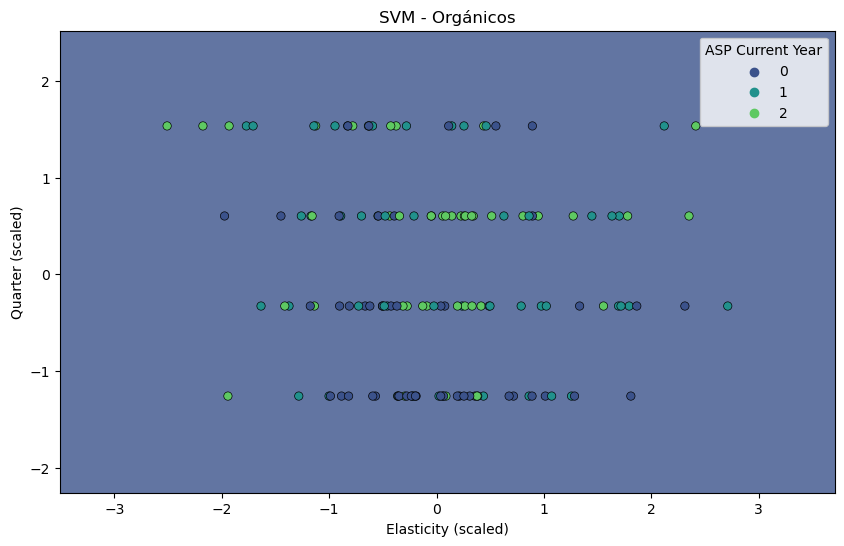

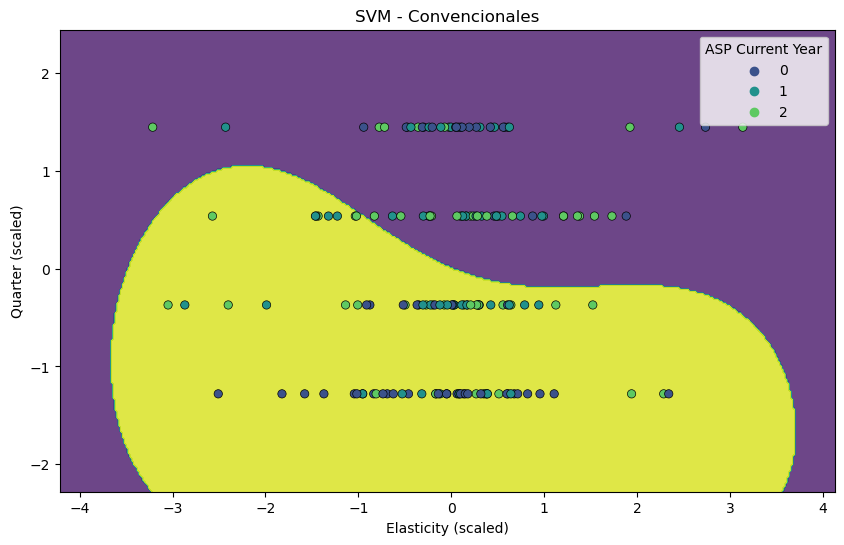

In [64]:
# Convertir etiquetas categóricas a numéricas para orgánicos y convencionales
y_organic_classes_num = y_organic_classes.map({'low': 0, 'medium': 1, 'high': 2})
y_conventional_classes_num = y_conventional_classes.map({'low': 0, 'medium': 1, 'high': 2})

# Función para visualizar el espacio de decisión
def plot_decision_boundary(X, y, model, title):
    X = X[['Elasticity', 'Quarter']].values  # Seleccionar solo dos columnas
    scaler_local = StandardScaler()
    X_scaled = scaler_local.fit_transform(X)

    # Crear una malla de puntos
    h = 0.02
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Escalar los puntos de la malla para que coincidan con los datos escalados
    mesh_points = scaler_local.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    sns.scatterplot(
        x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='viridis', edgecolor='k'
    )
    plt.title(title)
    plt.xlabel('Elasticity (scaled)')
    plt.ylabel('Quarter (scaled)')
    plt.show()

# Entrenar modelos simplificados con etiquetas numéricas para orgánicos
X_organic_simple = organic_data[['Elasticity', 'Quarter']]
X_train_org_simple, X_test_org_simple, y_train_org_simple, y_test_org_simple = train_test_split(
    X_organic_simple, y_organic_classes_num, test_size=0.3, random_state=42
)
X_train_org_simple_scaled = scaler.fit_transform(X_train_org_simple)
X_test_org_simple_scaled = scaler.transform(X_test_org_simple)

svm_model_org_simple = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
svm_model_org_simple.fit(X_train_org_simple_scaled, y_train_org_simple)

# Visualizar para orgánicos
plot_decision_boundary(X_organic_simple, y_organic_classes_num, svm_model_org_simple, "SVM - Orgánicos")

# Entrenar modelos simplificados con etiquetas numéricas para convencionales
X_conventional_simple = conventional_data[['Elasticity', 'Quarter']]
X_train_conv_simple, X_test_conv_simple, y_train_conv_simple, y_test_conv_simple = train_test_split(
    X_conventional_simple, y_conventional_classes_num, test_size=0.3, random_state=42
)
X_train_conv_simple_scaled = scaler.fit_transform(X_train_conv_simple)
X_test_conv_simple_scaled = scaler.transform(X_test_conv_simple)

svm_model_conv_simple = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
svm_model_conv_simple.fit(X_train_conv_simple_scaled, y_train_conv_simple)

# Visualizar para convencionales
plot_decision_boundary(X_conventional_simple, y_conventional_classes_num, svm_model_conv_simple, "SVM - Convencionales")


In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Predicciones
y_pred_org = svm_model_org.predict(X_test_org_scaled)  # Modelo para orgánicos

# Reporte de clasificación
print("Reporte de clasificación - Orgánicos:")
print(classification_report(y_test_org, y_pred_org))

# Matriz de confusión
cm_org = confusion_matrix(y_test_org, y_pred_org)
print("Matriz de Confusión - Orgánicos:")
print(cm_org)

# AUC para cada clase (One-vs-Rest)
lb_org = LabelBinarizer()
y_test_bin_org = lb_org.fit_transform(y_test_org)  # Convertir etiquetas a formato binario
y_pred_prob_org = svm_model_org.predict_proba(X_test_org_scaled)  # Probabilidades de predicción

# Calcular AUC para cada clase
auc_scores_org = []
for i in range(y_test_bin_org.shape[1]):
    auc_org = roc_auc_score(y_test_bin_org[:, i], y_pred_prob_org[:, i])
    auc_scores_org.append(auc_org)

# Mostrar AUC para cada clase
for i, auc_org in enumerate(auc_scores_org):
    print(f"AUC para la clase {lb_org.classes_[i]} (Orgánicos): {auc_org}")


Reporte de clasificación - Orgánicos:
              precision    recall  f1-score   support

        high       0.33      1.00      0.50        10
         low       0.73      0.53      0.62        15
      medium       0.67      0.11      0.18        19

    accuracy                           0.45        44
   macro avg       0.58      0.55      0.43        44
weighted avg       0.61      0.45      0.40        44

Matriz de Confusión - Orgánicos:
[[10  0  0]
 [ 6  8  1]
 [14  3  2]]
AUC para la clase high (Orgánicos): 0.7941176470588236
AUC para la clase low (Orgánicos): 0.8666666666666666
AUC para la clase medium (Orgánicos): 0.5768421052631578


In [66]:
# Predicciones
y_pred_conv = svm_model_conv.predict(X_test_conv_scaled)  # Modelo para convencionales

# Reporte de clasificación
print("Reporte de clasificación - Convencionales:")
print(classification_report(y_test_conv, y_pred_conv))

# Matriz de confusión
cm_conv = confusion_matrix(y_test_conv, y_pred_conv)
print("Matriz de Confusión - Convencionales:")
print(cm_conv)

# AUC para cada clase (One-vs-Rest)
lb_conv = LabelBinarizer()
y_test_bin_conv = lb_conv.fit_transform(y_test_conv)  # Convertir etiquetas a formato binario
y_pred_prob_conv = svm_model_conv.predict_proba(X_test_conv_scaled)  # Probabilidades de predicción

# Calcular AUC para cada clase
auc_scores_conv = []
for i in range(y_test_bin_conv.shape[1]):
    auc_conv = roc_auc_score(y_test_bin_conv[:, i], y_pred_prob_conv[:, i])
    auc_scores_conv.append(auc_conv)

# Mostrar AUC para cada clase
for i, auc_conv in enumerate(auc_scores_conv):
    print(f"AUC para la clase {lb_conv.classes_[i]} (Convencionales): {auc_conv}")


Reporte de clasificación - Convencionales:
              precision    recall  f1-score   support

        high       0.37      0.73      0.49        15
         low       0.41      0.90      0.56        10
      medium       0.00      0.00      0.00        27

    accuracy                           0.38        52
   macro avg       0.26      0.54      0.35        52
weighted avg       0.18      0.38      0.25        52

Matriz de Confusión - Convencionales:
[[11  4  0]
 [ 1  9  0]
 [18  9  0]]
AUC para la clase high (Convencionales): 0.7387387387387387
AUC para la clase low (Convencionales): 0.8904761904761904
AUC para la clase medium (Convencionales): 0.5333333333333333


c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Filtrar solo las columnas necesarias
filtered_data = california_base_df[['Type', 'ASP Current Year']].dropna()

# Codificar la variable categórica (Organic = 1, Conventional = 0)
label_encoder = LabelEncoder()
filtered_data['Type'] = label_encoder.fit_transform(filtered_data['Type'])

# Dividir las variables independientes y dependientes
X = filtered_data[['ASP Current Year']]
y = filtered_data['Type']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Conventional', 'Organic'])

# Imprimir los resultados
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
print("\nReporte de clasificación:\n")
print(report)

Precisión del modelo: 95.24%

Reporte de clasificación:

              precision    recall  f1-score   support

Conventional       0.95      0.95      0.95        42
     Organic       0.95      0.95      0.95        42

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



La matriz de confusión nos da una precisión bastante elevada tanto de identificación de falsos positivos y falsos negativos, como de coeficiente de recall. 

Para ello se han utilizado los siguientes pasos: 
. Usar un set de prueba del 20% i uno de entrenamiento del 80%
. Creamos un modelo de soporte vectorial de dos dimensiones ya que estamos haciendo un análisis bidimensional. 

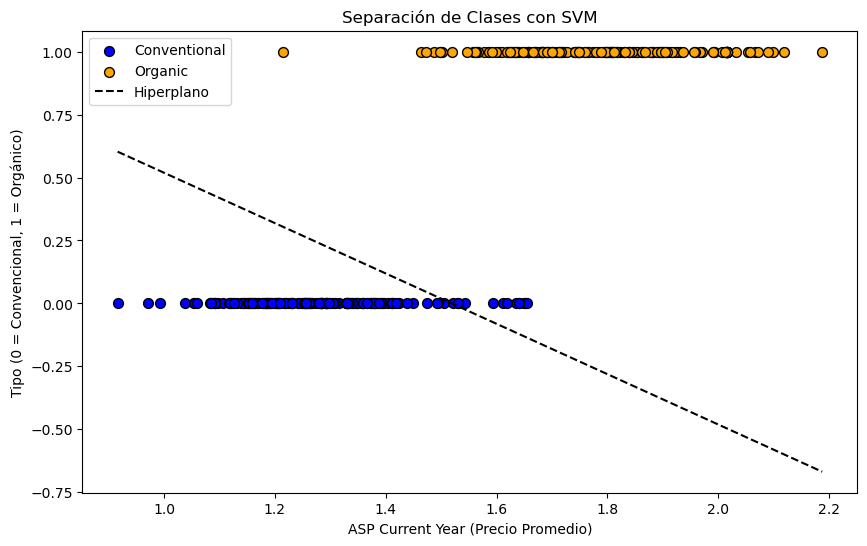

Precisión promedio del modelo con validación cruzada: 92.77%
Desviación estándar de la precisión: 9.37%


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Filtrar solo las columnas necesarias
filtered_data = california_base_df[['Type', 'ASP Current Year']].dropna()

# Codificar la variable categórica (Organic = 1, Conventional = 0)
label_encoder = LabelEncoder()
filtered_data['Type'] = label_encoder.fit_transform(filtered_data['Type'])

# Dividir las variables independientes y dependientes
X = filtered_data[['ASP Current Year']]
y = filtered_data['Type']

# Dividir los datos para visualización
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo SVM y entrenarlo
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Visualización de los datos y el hiperplano
plt.figure(figsize=(10, 6))

# Scatter plot de los datos de entrenamiento
for label, color in zip([0, 1], ['blue', 'orange']):
    plt.scatter(
        X_train[y_train == label]['ASP Current Year'],
        y_train[y_train == label],
        label=f"{'Conventional' if label == 0 else 'Organic'}",
        color=color,
        edgecolor='k',
        s=50
    )

# Generar el hiperplano
coef = svm_model.coef_[0]
intercept = svm_model.intercept_[0]
x_vals = np.linspace(X_train.min(), X_train.max(), 100).flatten()
y_vals = -(coef[0] * x_vals + intercept) / coef[0]

plt.plot(x_vals, y_vals, 'k--', label='Hiperplano')
plt.xlabel('ASP Current Year (Precio Promedio)')
plt.ylabel('Tipo (0 = Convencional, 1 = Orgánico)')
plt.title('Separación de Clases con SVM')
plt.legend()
plt.show()

# Validación cruzada con 5 folds
scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print(f"Precisión promedio del modelo con validación cruzada: {scores.mean() * 100:.2f}%")
print(f"Desviación estándar de la precisión: {scores.std() * 100:.2f}%")


Apreciamos en este hiperplano como el modelo puede distinguir entre los aguacates de tipo orgánicos y de tipo convencional. Y cómo según el precio promedio que tenga, el modelo será capaz de distinguir que aguacates són convencionales y cuales són orgánicos. 